### manually check the results

In [1]:
import pandas as pd

import sys
import os

from bertopic import BERTopic

field = 'VCG'
authorType = 'autoTop'

remapSet = set([-1, 12])
remapLen = len(remapSet) + 1

# field = sys.argv[1]
modelpath = f'./model/{field}/topicModel'

if not os.path.exists(modelpath):
    print('model not exists!')
    sys.exit(-1)

outDir = f'./output/{field}'
topic_model = BERTopic.load(modelpath)

/home/xl/anaconda3/envs/py39base/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# import json

# with open(f'{outDir}/paperID2topicOld.json', 'r') as f:
#     paperID2topicOld = json.load(f)
# paperIDSet = set(paperID2topicOld.keys())

In [13]:
len(topic_model.get_topics())

83

In [2]:
originDf = pd.read_csv(f'./src/papers_{field}_{authorType}.csv')
# originDfExists = originDf[originDf['paperID'].isin(paperIDSet)]
df = originDf.dropna()
df.reset_index(drop=True, inplace=True)
df['documents'] = (df['title'] + '. ') * 3 +  df['abstract']
paperKey = df.paperID.tolist()
docs = df.documents.tolist()
len(originDf), len(df), len(paperKey), len(docs)

(113597, 97777, 97777, 97777)

In [8]:
topic_model.get_document_info(docs).shape

(97777, 6)

In [3]:
topic_distr, _ = topic_model.approximate_distribution(docs, outPath=f'{outDir}/paperIDDisHasAb.csv', paperIDList=paperKey)


  0%|          | 0/98 [00:14<?, ?it/s]


ValueError: Length of values (97777) does not match length of index (171785)

In [5]:
df0 = pd.read_csv(f'{outDir}/paperIDDisHasAb.csv')
df0

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_72,topic_73,topic_74,topic_75,topic_76,topic_77,topic_78,topic_79,topic_80,topic_81
0,0.006761,0.015657,0.006342,0.005851,0.011849,0.006865,0.008651,0.007185,0.019441,0.023365,...,0.004578,0.001539,0.003258,0.006001,0.012911,0.017951,0.022188,0.006969,0.000770,0.006863
1,0.011205,0.021699,0.008888,0.009233,0.016937,0.011075,0.013158,0.009780,0.031050,0.035504,...,0.007587,0.002550,0.005400,0.007874,0.019758,0.026293,0.033997,0.011549,0.001277,0.008847
2,0.007719,0.006182,0.001496,0.003174,0.003245,0.007290,0.007476,0.003889,0.017547,0.005724,...,0.000539,0.001764,0.003736,0.000000,0.002170,0.000000,0.007956,0.006317,0.000883,0.003904
3,0.007867,0.024666,0.009935,0.012842,0.019916,0.007708,0.009692,0.006229,0.018566,0.008646,...,0.001131,0.002851,0.004146,0.000719,0.016192,0.019745,0.022320,0.009719,0.000917,0.004465
4,0.000266,0.017478,0.007661,0.008023,0.014861,0.000557,0.003046,0.003072,0.002153,0.004537,...,0.000478,0.000884,0.000357,0.001712,0.012148,0.017714,0.013088,0.002774,0.000034,0.001866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171780,0.003685,0.080968,0.003546,0.035006,0.008855,0.034013,0.003407,0.005154,0.007689,0.004484,...,0.001135,0.002786,0.003497,0.000000,0.000000,0.018049,0.000644,0.007760,0.001240,0.001175
171781,0.002293,0.055206,0.002206,0.022617,0.005726,0.021159,0.002688,0.003206,0.005065,0.003372,...,0.000706,0.001733,0.002175,0.000000,0.001187,0.011228,0.000401,0.004827,0.000772,0.000731
171782,0.002473,0.011124,0.000745,0.025614,0.006677,0.024675,0.002849,0.003739,0.005907,0.003052,...,0.000823,0.002021,0.002537,0.000000,0.001384,0.001748,0.000467,0.005630,0.000900,0.000852
171783,0.001662,0.069682,0.000808,0.015822,0.001775,0.000468,0.005199,0.004482,0.001756,0.005605,...,0.000515,0.000000,0.001057,0.001164,0.006241,0.001457,0.000000,0.006032,0.000000,0.000000


In [8]:
import numpy as np
max_idx = np.argmax(topic_distr, axis=1) 
max_idx

array([12, 18, 18, ..., 17, 13, 13])

In [14]:
len(originDf), len(originDfExists)

(15838, 0, 337693, 337693)

In [20]:
len(topic_model.get_topic_info())

4

In [27]:
df0 = originDf.fillna('')

In [28]:
len(df0), len(originDf), len(df)

(15838, 15838, 10995)

In [29]:
dfTopics = topic_model.get_topic_info()
dfTopics = dfTopics[dfTopics['Topic'] != -1]
dfTopics.reset_index(drop=True, inplace=True)

myCnt = [0] * len(dfTopics)
paperID2TopicDt = {}
for _, row in df0.iterrows():
    strPaperID = str(int(row['paperID']))
    title = row['title']
    abstract = row['abstract']
    
    if abstract == '':
        document = title
    else:
        document = title + '. ' + title + '. ' + title + '. ' + abstract
        
    similarTopics, similarity = topic_model.find_topics(document, top_n=4)
    
    if similarTopics[0] == -1:
        topicIdx = int(similarTopics[1])
    else:
        topicIdx = int(similarTopics[0])
        
    myCnt[topicIdx] += 1
        
    paperID2TopicDt[strPaperID] = topicIdx

In [34]:
# dfTopics.columns = ['Topic', 'Count0', 'Name']
# dfTopics['Count'] = myCnt
dfTopics = dfTopics[['Topic', 'Count', 'Name']]
dfTopics['Topic'].astype(int)
dfTopics['Count'].astype(int)
dfTopics.to_csv(f'{outDir}/topic_count_name.csv', index=False)

In [35]:
with open(f'{outDir}/paperID2topic.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(paperID2TopicDt, indent=4))

In [18]:
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs)

  0%|          | 0/11 [00:00<?, ?it/s]


NotFittedError: Vocabulary not fitted or provided

In [21]:
remapSet = set([-1, 12])
remapLen = len(remapSet) + 1

In [161]:
import numpy as np
import json

maxMetrics = np.argsort(-topic_distr, axis=1)[:, :remapLen]
outpath = f'./output/{field}'
with open(f'{outpath}/paperID2topic.json', 'r') as f:
    paperID2topicDt = json.load(f)

dfTopics = pd.read_csv(f'{outpath}/topic_count_name.csv')

paperIDIdxDt = {}
for idx, paperID in enumerate(paperKey):
    paperIDIdxDt[str(int(paperID))] = idx

remapCnt = dfTopics.Count.values.tolist()
sortedRemapList = list(remapSet)
sortedRemapList.sort()

In [162]:
import bisect

for _, row in originDf.iterrows():
    strPaperID = str(int(row['paperID']))
    oldIdx = paperID2topicDt[strPaperID]
    if oldIdx in remapSet:
        if paperIDIdxDt.__contains__(strPaperID):
            paperIdx = paperIDIdxDt[strPaperID]
            similarTopics = maxMetrics[paperIdx]
        else:        
            title = row['title']
            similarTopics, similarity = topic_model.find_topics(title, top_n=remapLen)
        
        for i in range(remapLen):
            topicIdx = int(similarTopics[i])
            if not topicIdx in remapSet:
                
                gapTopicIdx = bisect.bisect_left(sortedRemapList, topicIdx) - 1
                
                # save the final topic in the paperID2topicDt
                paperID2topicDt[strPaperID] = topicIdx - gapTopicIdx
                
                remapCnt[topicIdx] += 1
                break
    else:
        # save the final topic in the paperID2topicDt
        paperID2topicDt[strPaperID] = oldIdx - bisect.bisect_left(sortedRemapList, oldIdx) + 1
        
descRemoveList = list(remapSet - set([-1]))
descRemoveList.sort(reverse=True)
descRemoveList

[12]

In [163]:
def removeDfRow(df, removeList):
    for idx in removeList:
        df = df.drop(idx)
    return df

def removeListElement(ll, removeList):
    for idx in removeList:
        ll.pop(idx)
    return ll

In [164]:
with open(f'{outpath}/paperID2topic.json', 'w') as f:
    f.write(json.dumps(paperID2topicDt, indent=2, ensure_ascii=False))

In [168]:
remapCntNew = removeListElement(remapCnt, descRemoveList)

infoList = []

for _, row in dfTopics.iterrows():
    topic, count, name = row
    gap = bisect.bisect_left(sortedRemapList, topic) - 1
    topic = topic - gap
    name = '_'.join([str(topic)] + name.split('_')[1:])
    infoList.append([topic, remapCntNew[topic], name])

df = pd.DataFrame(infoList, columns=['Topic', 'Count', 'Name'])
df.to_csv(f'{outpath}/topic_count_name.csv', index=False)
# cntSeries = pd.Series(remapCntNew, name='Count', dtype=int)
# topicSeries = pd.Series(range(len(remapCntNew)), name='Topic', dtype=int)

# dfTopics = dfTopics[['Count', 'Name']]
# dfTopics.columns = ['Count0', 'Name']
# dfTopics = removeDfRow(dfTopics, descRemoveList)

# dfTopics.reset_index(drop=True, inplace=True)
# dfTopics = pd.concat([topicSeries, dfTopics, cntSeries], axis=1)

# dfTopics = dfTopics[['Topic', 'Count', 'Name']]
# dfTopics


IndexError: list index out of range

In [169]:
len(remapCntNew)

78

In [158]:
len(remapCnt)

79

In [149]:
dfTopics = dfTopics[['Topic', 'Count', 'Name']]
dfTopics['Topic'].astype(int)
dfTopics['Count'].astype(int)
dfTopics.reset_index(inplace=True, drop=True)

dfTopics.to_csv(f'{outpath}/topic_count_name.csv', index=False)
dfTopics

,Topic,Count,Name
0,0,6655,0_image_apparatus_display_device
1,1,5275,1_imaging_ct_medical_surgical
2,2,2830,2_flow_vortex_jet_velocity
3,3,2515,3_volume_rendering_ray_tracing
4,4,2062,4_fluid_flow_particle_simulation
...,...,...,...
76,77,581,77_geospatial_geographic_geovisualization_cart...
77,78,194,78_network_networks_dynamic_node
78,79,159,79_embodiments_embodiment_image_invention
79,80,129,80_hair_hairstyles_hairstyle_strands


In [ ]:
df = pd.read_csv(f'{outpath}/topic_location.csv')
df = removeDfRow(df, descRemoveList)
df.to_csv(f'{outpath}/topic_location.csv', index=False)

In [ ]:
with open(f'{outpath}/topic_word_prob_raw.json', 'r') as f:
    topic_word_prob = json.load(f)

topic_word_prob = removeListElement(topic_word_prob, descRemoveList)
with open(f'{outpath}/topic_word_prob_raw.json', 'w') as f:
    f.write(json.dumps(topic_word_prob, indent=2, ensure_ascii=False))

In [1]:
import os
import pandas as pd 

authorID = 288512535
field = 'turing'
df = pd.read_csv(f'/home/sy/MAGProcessing/create_field/out/{field}/papers/{authorID}.csv')
paperIDList = df['paperID'].tolist()
len(paperIDList)
# for fn in os.listdir('/home/sy/MAGProcessing/create_field/out/VCG/papers'):
#     df = pd.read_csv(f'/home/sy/MAGProcessing/create_field/out/VCG/papers/{fn}')
#     paperIDSet = set(df['paperID'].tolist())
#     if paperIDSet.__contains__(paperID):
#         print(fn)
#         break

1530

In [2]:
import json

with open(f'./output/{field}/paperID2topic.json', 'r') as f:
    paperID2topic = json.load(f)

for paperID in paperIDList:
    print(paperID2topic[str(paperID)])

58
41
100
29
58
60
0
7
75
100
58
29
37
42
107
29
17
7
104
29
46
41
29
29
42
7
60
15
60
41
37
7
60
100
75
42
11
100
58
7
102
41
58
60
7
52
52
42
26
100
100
17
52
106
60
60
104
29
42
75
64
100
100
17
29
106
100
60
75
27
32
60
29
37
29
41
104
29
29
49
78
60
60
41
35
60
41
15
48
60
58
29
52
41
63
7
41
60
29
107
29
60
38
41
58
39
29
29
0
84
38
107
38
60
101
60
60
37
9
52
29
100
107
60
42
15
58
100
60
29
60
60
60
75
4
29
29
7
18
7
60
11
29
29
40
60
101
100
100
75
11
41
60
100
7
37
100
41
7
29
100
7
62
42
75
49
101
29
107
75
29
100
100
29
100
3
100
29
100
101
75
100
7
49
11
29
29
100
37
23
41
41
58
107
7
101
29
100
75
101
60
7
29
29
1
7
29
7
41
107
37
107
29
60
100
17
41
100
100
60
41
62
3
60
60
75
26
7
107
75
100
11
100
60
52
11
60
9
100
100
60
59
75
58
60
41
75
41
60
29
42
29
60
100
60
58
0
42
29
11
60
41
107
22
100
60
9
3
75
37
107
101
60
60
41
37
29
7
75
60
60
7
7
7
52
29
58
75
49
29
52
58
26
101
7
58
9
100
49
75
60
60
41
37
100
42
101
58
13
100
60
60
9
100
60
7
60
104
48
74
7
60
100
11
1

In [11]:
import pandas as pd
import json
import os

srcField = 'ACMfellowTuring'
# targetField = 'ACMfellow'
targetField = 'turing'

df0 = pd.read_csv(f'./src/papers_{targetField}_autoTop.csv')
paperIDList = df0['paperID'].tolist()
paperIDSet = set(paperIDList)
os.makedirs(f'./output/{targetField}', exist_ok=True)

In [12]:
with open(f'./output/{srcField}/paperID2topic.json', 'r') as f:
    paperID2topicDt = json.load(f)
    
paperID2topicTar = {}
for paperID in paperIDList:
    paperID2topicTar[str(paperID)] = paperID2topicDt[str(paperID)]
with open(f'./output/{targetField}/paperID2topic.json', 'w') as f:
    f.write(json.dumps(paperID2topicTar, indent=2, ensure_ascii=False))

In [13]:
import os

copyFileList = ['topic_distribution.html', 'topic_location.csv', 'topic_word_prob_raw.json']
for file in copyFileList:
    os.system(f'cp ./output/{srcField}/{file} ./output/{targetField}/{file}')

In [14]:
df = pd.read_csv(f'./output/{srcField}/topic_count_name.csv')

topicCnt = [0] * len(df)
for topic in paperID2topicTar.values():
    topicCnt[topic] += 1

df['Count'] = topicCnt
df.to_csv(f'./output/{targetField}/topic_count_name.csv', index=False)


In [15]:
os.system(f'bash geneOthers.sh {targetField}')

0

In [6]:
import os
srcField = 'AIBackup2'
targetField = 'AI'

os.system(f'bash geneOthers.sh {srcField}')

0

In [7]:
import os
import paramiko

def execute_command_as_root(ssh, command, sudo_password):
    """ Execute a single command as root using sudo and the provided password """
    command = f"sudo -S -p '' {command}"
    stdin, stdout, stderr = ssh.exec_command(command)
    stdin.write(sudo_password + "\n")
    stdin.flush()
    return stdout.readlines(), stderr.readlines()

def upload_file_as_root(srcfield, targetField):
    server = '82.156.152.182'
    port = 22
    username = 'xl'
    password = 'QWer!@34'
    sudo_password = 'QWer!@34'
    
    ssh = paramiko.SSHClient()
    ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
    ssh.connect(server, port, username, password)

    # Create directory as root if needed
    srcBaseDir = f'./output/{srcfield}'
    tarBaseDir = f'/home/xfl/pyCode/GFVisTest/csv/{targetField}'
    
    stdout, stderr = execute_command_as_root(ssh, f"mkdir -p {tarBaseDir}", sudo_password)
    if stderr:
        print("Error in creating directory:", stderr)
        return

    files = ['paperID2topic.json', 'field_leaves.csv', 'field_roots.csv'] 
    
    for file in files:
        sftp = ssh.open_sftp()
        
        # Temporarily upload file to a user-writable location
        tmpName = f"/tmp/{file}"
        sftp.put(f'{srcBaseDir}/{file}', tmpName)
        sftp.close()

        # Move file to the final location as root
        _, stderr = execute_command_as_root(ssh, f"mv {tmpName} {tarBaseDir}/{file}", sudo_password)
        if stderr:
            print("Error in moving file:", stderr)

    ssh.close()

In [8]:
upload_file_as_root(srcField, targetField)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizerModel = CountVectorizer(stop_words="english")

stopWordsList = list(vectorizerModel.get_stop_words())
stopWordsList.sort()

with open('./src/stopWordsList.txt', 'w') as f:
    f.write('\n'.join(stopWordsList))

In [43]:
import pandas as pd

df0 = pd.read_csv('./src/papers_ACMfellow_autoTop.csv')
df1 = pd.read_csv('./src/papers_turing_autoTop.csv')

len(df0), len(df1)

(330721, 16271)

In [44]:
df = pd.concat([df0, df1], axis=0)
len(df)

346992

In [45]:
df.reset_index(drop=True, inplace=True)
df.drop_duplicates(subset=['paperID'], inplace=True)
len(df)

335175

In [46]:
df.to_csv('./src/papers_ACMfellowTuring_autoTop.csv', index=False)

In [47]:
dfHasAb = df.dropna(subset=['abstract'])

hasAbLen = len(dfHasAb)
hasAbLen

270987

In [48]:
import math
ratio = 1
baseTopicCount = int((80 + 30 * math.log(hasAbLen / 100000) + 1) * ratio)
minTopicSize = int((int(100 * (1 + math.log(hasAbLen / 100000))) + hasAbLen / 10000) / ratio)
baseTopicCount, minTopicSize

(110, 226)

In [19]:
from bertopic import BERTopic
import pandas as pd 

field = 'SE'
# field = 'VCG'
authorType = 'autoTop'
outDir = f'./output/{field}'
modelPath = f'./model/{field}'
originDf = pd.read_csv(f'./src/papers_{field}_{authorType}.csv')
df = originDf.dropna()

df['documents'] = (df['title'] + '. ') * 3 +  df['abstract']
paperKey = df.paperID.tolist()
docs = df.documents.tolist()

topic_model = BERTopic.load(f'{modelPath}/topicModel')

topic_distr, _ = topic_model.approximate_distribution(docs)
topicNum = topic_distr.shape[1]

print(topicNum)
dfDis = pd.DataFrame(topic_distr, columns=[f'topic_{i}' for i in range(topicNum)])
dfDis['paperID'] = paperKey
dfDis = dfDis[['paperID'] + [f'topic_{i}' for i in range(topicNum)]]

# dfDis.to_csv(f'{outDir}/paperIDDistribution.csv', index=False)



100%|██████████| 157/157 [03:15<00:00,  1.24s/it]


96


In [20]:
import numpy as np
hasAbPaperIDSet = set(paperKey)

remapList = []
paperIDList = []
for _, row in originDf.iterrows():
    paperID = int(row['paperID'])
    if hasAbPaperIDSet.__contains__(paperID):
        continue
    
    title = row['title']
    similarTopics, similarity = topic_model.find_topics(title, top_n=(topicNum + 1))
    # similarTopics, similarity = topic_model.find_topics(title)
    simiList = [0] * topicNum
    for topicIdx, sim in zip(similarTopics, similarity):
        if topicIdx == -1:
            continue
        simiList[topicIdx] = sim
    
    remapList.append(simiList)
    paperIDList.append(paperID)

dfRemap = pd.DataFrame(remapList, columns=[f'topic_{i}' for i in range(topicNum)])
dfRemap['paperID'] = paperIDList
dfRemap = dfRemap[['paperID'] + [f'topic_{i}' for i in range(topicNum)]]

dfAll = pd.concat([dfDis, dfRemap], axis=0)
dfAll.reset_index(drop=True, inplace=True)

# keep to 5 decimal places
dfAll = dfAll.round(5)

# save paperID as int
dfAll['paperID'] = dfAll['paperID'].astype(int)

# replace 0 with nan
dfAll.replace(0, np.nan, inplace=True)

# save to csv
dfAll.to_csv(f'{outDir}/paperIDDistribution.csv', index=False)


In [2]:
import pandas as pd
import numpy as np

field = 'fellowVSNon'
outDir = f'./output/{field}'
df = pd.read_csv(f'{outDir}/paperIDDistribution.csv')  


,paperID,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_410,topic_411,topic_412,topic_413,topic_414,topic_415,topic_416,topic_417,topic_418,topic_419
0,1020941659,0.001479,0.002333,0.002029,0.001974,0.000516,0.001125,0.002563,0.000937,0.001238,...,0.001407,0.003071,0.001307,0.002736,0.000966,0.001974,0.002680,0.001334,0.001050,0.002312
1,1023023376,0.000614,0.001333,0.000861,0.000989,0.000229,0.000471,0.001083,0.000446,0.000525,...,0.000558,0.001344,0.000544,0.001288,0.000400,0.001075,0.001582,0.000560,0.000425,0.001023
2,122037280,0.000683,0.002059,0.000692,0.000990,0.000196,0.000474,0.000646,0.000412,0.000573,...,0.000480,0.000775,0.000512,0.000757,0.000403,0.001316,0.001321,0.000483,0.000419,0.000790
3,12446978,0.000513,0.001107,0.000447,0.000784,0.000172,0.000345,0.000423,0.000362,0.000459,...,0.000344,0.000513,0.000366,0.000488,0.000300,0.000892,0.000713,0.000355,0.000314,0.000566
4,128716480,0.001853,0.000612,0.000521,0.000810,0.000486,0.001358,0.000471,0.000585,0.003204,...,0.000752,0.000507,0.000990,0.000476,0.002567,0.000611,0.000510,0.000793,0.002758,0.000672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923485,94853982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
923486,98541539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
923487,2550118134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
923488,2609131881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.fillna(0, inplace=True)
df = df.round(3)

df.replace(0, np.nan, inplace=True)
df.to_csv(f'{outDir}/paperIDDistribution.csv', index=False)

In [1]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import umap
import os

field = 'fellowVSNon'
df = pd.read_csv(f'./src/papers_{field}_autoTop.csv')

df['documents'] = (df['title'] + '. ') * 3 +  df['abstract']
df = df.dropna(subset=['documents'])

paperKey = df.paperID.tolist()
docs = df.documents.tolist()
len(df)
# vectorizerModel = CountVectorizer(stop_words="english")
# topic_model = BERTopic(verbose=True, embedding_model="paraphrase-MiniLM-L12-v2", min_topic_size=97, calculate_probabilities=True, vectorizer_model=vectorizerModel)
# topics, probs = topic_model.fit_transform(docs)
# topicDistDefault, _ = topic_model.approximate_distribution(docs)
# topicDistEmbeddingsSum, topicDistEmbeddingMean = topic_model.approximate_distribution(docs, use_embedding_model=True, useMean=True)

/home/xl/anaconda3/envs/py39base/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


735857

In [3]:
topic_model = BERTopic.load(f'./model/{field}/topicModel')
# docEmbeddings = topic_model._extract_embeddings(docs,
#                                                 method="document",
#                                                 verbose=False)

In [201]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,382046,-1_data_based_using_time,"[data, based, using, time, network, model, sys...",[Enabling Intelligent Services at the Network ...
1,0,30075,0_protein_cancer_gene_cell,"[protein, cancer, gene, cell, cells, expressio...",[Learning protein sequence embeddings using in...
2,1,19836,1_memory_cache_scheduling_parallel,"[memory, cache, scheduling, parallel, performa...",[Miss Penalty Aware Cache Replacement for Hybr...
3,2,18888,2_privacy_security_secure_attacks,"[privacy, security, secure, attacks, encryptio...",[Privacy-Preserving database systems. Privacy-...
4,3,18058,3_social_web_search_text,"[social, web, search, text, retrieval, informa...",[Information retrieval on the semantic web. In...
...,...,...,...,...,...
110,109,540,109_emissions_china_carbon_environmental,"[emissions, china, carbon, environmental, ener...",[Public-private partnerships investment in ene...
111,110,533,110_adhesion_biofilm_bacterial_bacteria,"[adhesion, biofilm, bacterial, bacteria, surfa...",[Emergent Properties in Streptococcus mutans B...
112,111,533,111_caching_cache_content_proxy,"[caching, cache, content, proxy, web, caches, ...",[Fundamental Limits of Caching. Fundamental Li...
113,112,523,112_holographic_holography_hologram_holograms,"[holographic, holography, hologram, holograms,...",[Digital holographic display for a single user...


In [2]:
originDf = pd.read_csv(f'./src/papers_{field}_autoTop.csv')
originDf['documents'] = (originDf['title'] + '. ') * 3 +  originDf['abstract'].apply(lambda x: x if type(x) == str else '')
originPaperKey = originDf.paperID.tolist()
originDocs = originDf.documents.tolist()

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
suffix = '-tc100'
dirMid = f'{field}{suffix}'
outDir = f'./output/{dirMid}'

topic_model = BERTopic.load(f'./model/{dirMid}/topicModel')
# docEmbeddings = topic_model._extract_embeddings(originDocs,
#                                                 method="document",
#                                                 verbose=False)
topicModel = topic_model
# dfDoc = topicModel.get_document_info(docs)
# dfDoc = dfDoc[['Topic']]
# dfDoc['paperID'] = paperKey
# dfDoc = dfDoc[['paperID', 'Topic']]
# dfDoc.to_csv(f'{outDir}/docInfo.csv', index=False)

In [49]:
topicEmbeddings = topic_model.topic_embeddings_[topic_model._outliers:]

In [50]:
import numpy as np
distances = np.array([np.linalg.norm(docEmbedding - topicEmbeddings, axis=1) for docEmbedding in docEmbeddings])
distances

array([[4.313    , 4.0383897, 3.9577558, ..., 4.211617 , 4.229608 ,
        4.1583614],
       [3.7734592, 3.5465102, 3.7303977, ..., 3.7749426, 3.7319865,
        3.7955072],
       [4.2144213, 4.405178 , 4.4334207, ..., 4.6015115, 4.3353486,
        4.622661 ],
       ...,
       [2.6689098, 2.475761 , 2.6355257, ..., 2.9049397, 3.0768683,
        2.7417042],
       [3.3077786, 3.4472876, 3.2421823, ..., 3.5335007, 3.6564198,
        3.6465814],
       [3.6846497, 3.7607188, 3.5180392, ..., 4.0995655, 4.0764484,
        3.9212651]], dtype=float32)

In [51]:
dfDis = pd.DataFrame(distances, columns=[f'topic_{i}' for i in range(len(topicEmbeddings))])
dfDis.round(3)
dfDis['paperID'] = originPaperKey
dfDis = dfDis[['paperID'] + [f'topic_{i}' for i in range(len(topicEmbeddings))]]


In [52]:
dfDis.to_csv(f'{outDir}/paperIDEuDisDist.csv', index=False)

In [53]:
from scipy.spatial import distance
def mahalanobis_distance(vector, vectors, cov_inv):
    """
    Calculate the Mahalanobis distance between a vector and a group of vectors.
    
    Parameters:
    vector : array_like
        The vector for which distances are to be calculated.
    vectors : array_like
        An array of vectors to which distances are to be calculated.
    cov_inv : array_like
        The inverse covariance matrix of the vectors.
        
    Returns:
    array_like
        An array of Mahalanobis distances between the vector and each vector in vectors.
    """
    # Calculate the Mahalanobis distance between the vector and each vector in vectors
    distances = []
    for v in vectors:
        diff = v - vector
        distances.append(distance.mahalanobis(diff, np.zeros_like(diff), cov_inv))
    return distances


In [54]:
np.max(topicEmbeddings), np.min(topicEmbeddings), np.max(np.linalg.norm(topicEmbeddings, axis=1)), np.min(np.linalg.norm(topicEmbeddings, axis=1))

(0.61503804, -0.6462525, 3.4521601, 1.7784846)

In [32]:
topicEmbeddings

array([[ 0.00447418, -0.06822333,  0.0349725 , ...,  0.36694866,
        -0.30486712, -0.11735075],
       [-0.15103908, -0.01540668, -0.11444356, ...,  0.09309144,
        -0.05127537, -0.04427475],
       [-0.25877124,  0.1997703 , -0.09114111, ...,  0.08281267,
        -0.21931039, -0.0186795 ],
       ...,
       [-0.24492382,  0.0651021 ,  0.0396539 , ...,  0.17292042,
        -0.23775332,  0.01904327],
       [-0.03532761, -0.19404824,  0.09298113, ...,  0.16325969,
        -0.19260304, -0.1004628 ],
       [-0.24408428,  0.07180458,  0.07191349, ...,  0.22068013,
        -0.09995294, -0.04096314]], dtype=float32)

In [31]:
cov_matrix = np.cov(topicEmbeddings.T)
cov_matrix

array([[ 8.02159846e-03, -8.82491236e-04,  1.31109670e-03, ...,
         2.55232489e-03, -2.44743704e-03, -1.49739825e-04],
       [-8.82491236e-04,  9.11994753e-03,  4.27978545e-04, ...,
        -3.60404650e-03,  5.61209387e-04,  2.18592754e-03],
       [ 1.31109670e-03,  4.27978545e-04,  1.00124224e-02, ...,
         7.10965260e-04, -1.73542440e-03,  1.05123229e-03],
       ...,
       [ 2.55232489e-03, -3.60404650e-03,  7.10965260e-04, ...,
         1.13917512e-02, -4.28414319e-03, -2.60654567e-04],
       [-2.44743704e-03,  5.61209387e-04, -1.73542440e-03, ...,
        -4.28414319e-03,  1.22830893e-02, -8.30538710e-05],
       [-1.49739825e-04,  2.18592754e-03,  1.05123229e-03, ...,
        -2.60654567e-04, -8.30538710e-05,  5.70413855e-03]])

In [44]:
np.max(cov_matrix), np.min(cov_matrix)

(0.016300110919069116, -0.008459787210724002)

In [30]:
cov_inv = np.linalg.inv(cov_matrix)
cov_inv

array([[1.79874625e+13, 1.80184424e+13, 1.79359047e+13, ...,
        1.80431719e+13, 1.81155786e+13, 1.81056226e+13],
       [1.80184424e+13, 1.80494757e+13, 1.79667958e+13, ...,
        1.80742478e+13, 1.81467791e+13, 1.81368060e+13],
       [1.79359047e+13, 1.79667958e+13, 1.78844949e+13, ...,
        1.79914546e+13, 1.80636536e+13, 1.80537261e+13],
       ...,
       [1.80431719e+13, 1.80742478e+13, 1.79914546e+13, ...,
        1.80990541e+13, 1.81716849e+13, 1.81616980e+13],
       [1.81155786e+13, 1.81467791e+13, 1.80636536e+13, ...,
        1.81716849e+13, 1.82446073e+13, 1.82345803e+13],
       [1.81056226e+13, 1.81368060e+13, 1.80537261e+13, ...,
        1.81616980e+13, 1.82345803e+13, 1.82245589e+13]])

In [45]:
np.max(cov_inv), np.min(cov_inv)

(39486850060606.46, 16764112496035.889)

In [17]:
cov_matrix = np.cov(topicEmbeddings.T)  # Calculate covariance matrix
cov_inv = np.linalg.inv(cov_matrix)
# distances = []
# for docEmbedding in docEmbeddings:
#     distances.append(mahalanobis_distance(docEmbedding, topicEmbeddings, cov_inv))
# distances

KeyboardInterrupt: 

In [47]:
mahalanobis_distance(docEmbeddings[0] topicEmbeddings, cov_inv)

[256.53649280403164,
 256.2359533244462,
 259.03922233952824,
 258.2650603281795,
 256.5449598254716,
 257.7536782879612,
 257.8640188858711,
 258.33052285466556,
 260.4921868350622,
 259.03887879873963,
 258.63873644083816,
 259.7299822486509,
 259.8283517863948,
 260.56623718854416,
 258.7576850647666,
 256.73071662812276,
 257.5195322047593,
 256.86636962477326,
 258.33564578272404,
 258.12197816525463,
 258.8222273121568,
 259.0240972605728,
 260.41011481677094,
 258.52574773517455,
 257.98700334930044,
 259.73187903626786,
 258.17037369316336,
 257.29955743772183,
 259.9951173897011,
 259.363097257279,
 259.60674793648786,
 256.32049677798386,
 257.75375379364345,
 256.58044598689247,
 257.4365932063594,
 259.3890053862991,
 257.78857025300414,
 258.96039128603405,
 257.7338213484207,
 257.46790257766,
 257.8616292429984,
 257.02205895081704,
 258.5293638452675,
 259.2170251840666,
 258.2609478267751,
 257.67508084264085,
 259.140470792226,
 259.06302590011944,
 257.3878281728578,

()

In [196]:
os.path.exists(f'./output/{dirMid}')

True

In [ ]:
docSim = cosine_similarity(docEmbeddings, topicModel.topic_embeddings_[topicModel._outliers:])

In [139]:
import numpy as np
outDir = f'./output/{dirMid}'
dfSim = pd.DataFrame(docSim, columns=[f'topic_{i}' for i in range(docSim.shape[1])])
dfSim['paperID'] = originPaperKey
dfSim = dfSim.round(3)
dfSim.replace(0.0, np.nan, inplace=True)
dfSim['paperID'] = dfSim['paperID'].astype(int)
dfSim = dfSim[['paperID'] + [f'topic_{i}' for i in range(docSim.shape[1])]]
dfSim.to_csv(f'{outDir}/paperIDDistribution.csv', index=False)

max_idx = np.argmax(docSim, axis=1)
paperIDMaxIdxDt = {}
for paperID, idx in zip(originPaperKey, max_idx):
    paperIDMaxIdxDt[str(int(paperID))] = idx

In [140]:
doc_info = topicModel.get_document_info(docs)
doc_topic_info = doc_info["Topic"].values
doc_info.drop(columns=['Document', 'Name', 'Top_n_words', 'Probability', 'Representative_document'], inplace=True)
df_topics = topicModel.get_topic_info()
df_topics = df_topics[['Topic', 'Count', 'Name']]
# df_topics.to_csv(f'{outDir}/topic_count_name_N1.csv', index=False)
df_topics = df_topics.loc[df_topics.Topic != -1, :]

paperIDIdxDt = {}
for idx, paperID in enumerate(paperKey):
    paperIDIdxDt[str(int(paperID))] = idx

paperID2topicDt = {}

remapCnt = df_topics.Count.values.tolist()

for _, row in originDf.iterrows():
    strPaperID = str(int(row['paperID']))
    if paperIDIdxDt.__contains__(strPaperID):
        idx = paperIDIdxDt[strPaperID]
        topicIdx = int(doc_topic_info[idx])
        if topicIdx == -1:
            topicIdx = int(max_idx[paperIDMaxIdxDt[strPaperID]])
            remapCnt[topicIdx] += 1
    else:
        topicIdx = int(max_idx[paperIDMaxIdxDt[strPaperID]])
        remapCnt[topicIdx] += 1
        
    paperID2topicDt[strPaperID] = topicIdx

In [141]:
from datetime import datetime
import json
import sys

cntSeries = pd.Series(remapCnt, name='Count', dtype=int)
df_topics.columns = ['Topic', 'Count0', 'Name']
df_topics.reset_index(drop=True, inplace=True)
df_topics = pd.concat([df_topics, cntSeries], axis=1)
df_topics = df_topics[['Topic', 'Count', 'Name']]

df_topics['Topic'].astype(int)
df_topics['Count'].astype(int)
df_topics.to_csv(f'{outDir}/topic_count_name.csv', index=False)

nowDate = str(datetime.now().isoformat(sep=' ', timespec='milliseconds'))[2:10]
nowDate = nowDate.replace('-', '')
df_topics.to_csv(f'{outDir}/topic_{field}_{len(df_topics)}_{nowDate}.csv', index=False)
data = []
for i in range(topicModel.get_topic_info().shape[0] - 1):
    topicID = topicModel.get_topic(i)      # 每个topic由10个word构成，打印第i个topic中每个(word, prob)
    topic_word_prob = {word: prob for word, prob in topicID}
    data.append(topic_word_prob)
data = json.dumps(data, indent=4, separators=(',', ': '))
with open(f'{outDir}/topic_word_prob_raw.json', "w") as f:
    f.write(data)

fig = topicModel.visualize_topics(output_path=outDir)
fig.write_html(f'{outDir}/topic_distribution.html')

with open(f'{outDir}/paperID2topic.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(paperID2topicDt, indent=4))

In [170]:
probs = topicModel.probabilities_
dfProbs = pd.DataFrame(probs, columns=[f'topic_{i}' for i in range(probs.shape[1])])
dfProbs = dfProbs.round(4)

In [172]:
dfProbs.replace(0.0, np.nan, inplace=True)
dfProbs['paperID'] = paperKey
dfProbs = dfProbs[['paperID'] + [f'topic_{i}' for i in range(probs.shape[1])]]
dfProbs.to_csv(f'{outDir}/paperIDDist-Probs.csv', index=False)

In [174]:
topic_model = topicModel
topic_distr, _ = topic_model.approximate_distribution(docs)
dfTopicDist = pd.DataFrame(topic_distr, columns=[f'topic_{i}' for i in range(topic_distr.shape[1])])
dfTopicDist = dfTopicDist.round(4)
dfTopicDist.replace(0.0, np.nan, inplace=True)
dfTopicDist['paperID'] = paperKey
dfTopicDist = dfTopicDist[['paperID'] + [f'topic_{i}' for i in range(topic_distr.shape[1])]]
dfTopicDist.to_csv(f'{outDir}/paperIDDist-tfidf-AD.csv', index=False)

 11%|█         | 79/736 [04:07<34:21,  3.14s/it] 


KeyboardInterrupt: 

### extract distribution

In [20]:
import pandas as pd
import numpy as np

def fetchArray(df):
    df.fillna(0, inplace=True)
    docSim = []
    for _, row in df.iterrows():
        docSim.append(row.values.tolist()[1:])
    
    return np.asarray(docSim)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
topNum = 5
def saveFig(data, title, outpath, isSimilarity=False, myTopNum = None, xlabel='Similarity'):
    thisTopNum = myTopNum or topNum
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'orange', 'green', 'red', 'purple']
    for i in range(thisTopNum - 1, -1, -1):
        # sns.kdeplot(data[:, i], color=colors[i], shade=False, label=f'top_{thisTopNum - i}')
        sortedData = np.sort(data[:, i])
        cdf = np.linspace(0, 1, len(data[:, i]))
        plt.plot(sortedData, cdf, color=colors[i], label=f'top_{thisTopNum - i}')
    if isSimilarity:
        plt.xticks(np.arange(0, 1, 0.05))
    else:
        plt.yscale('log')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.savefig(outpath)
    plt.close()
    print(f'save fig {outpath}')

In [41]:
field = 'fellowVSNon'
suffix = '-tc400'
dirMid = f'{field}{suffix}'
outDir = f'./output/{dirMid}'

In [22]:
dfSim = pd.read_csv(f'{outDir}/paperIDDistribution.csv')
docSim = fetchArray(dfSim)
dfDoc = pd.read_csv(f'{outDir}/docInfo.csv')
originTopics = dfDoc['Topic'].values
originDf = pd.read_csv(f'./src/papers_{field}_autoTop.csv')
paperKey = originDf.dropna(subset=['abstract']).paperID.tolist()
dfDoc['paperID'] = paperKey
dfPosPaperIDSet = set(dfDoc[dfDoc['Topic'] != -1]['paperID'].tolist())
dfNegPaperIDSet = set(dfDoc[dfDoc['Topic'] == -1]['paperID'].tolist())

# originDf = pd.read_csv(f'./src/papers_{field}_autoTop.csv')

df = originDf.dropna(subset=['abstract'])
hasAbPaperID = set(df.paperID.tolist())
hasAbIndices = df.index.tolist()

hasAbPosIndices = originDf[originDf['paperID'].isin(dfPosPaperIDSet)].index.tolist()
hasAbNegIndices = originDf[originDf['paperID'].isin(dfNegPaperIDSet)].index.tolist()

noAbDf = originDf[~originDf['paperID'].isin(hasAbPaperID)]
noAbIndices = noAbDf.index.tolist()

sortedSim = np.sort(docSim, axis=1)


In [42]:
dfProbs = pd.read_csv(f'{outDir}/paperIDDist-Probs.csv')
# dfProbs = pd.read_csv(f'{outDir}/paperIDDist-tfidf-AD.csv')
# dfProbs = pd.read_csv(f'{outDir}/paperIDDist-embedding-AD.csv')

probs = fetchArray(dfProbs)
df = originDf.dropna(subset=['abstract'])
df = df.reset_index(drop=True)

hasAbPosIndices = df[df['paperID'].isin(dfPosPaperIDSet)].index.tolist()
hasAbNegIndices = df[df['paperID'].isin(dfNegPaperIDSet)].index.tolist()

sortedProbs = np.sort(probs, axis=1)

In [24]:
import os
topNum = 5
def saveFigs(sortedSim, suffix, isSimilarity=False, xlabel='Similarity', xAbbr='Sim', partHaveAb=True):
    topSim = sortedSim[:, -topNum:]
    if partHaveAb:
        topSimHasAb = topSim[hasAbIndices]
        topSimNoAb = topSim[noAbIndices]
    topSimHasAbPos = topSim[hasAbPosIndices]
    topSimHasAbNeg = topSim[hasAbNegIndices]
        
    figOutDir = f'{outDir}/fig{suffix}'
    os.makedirs(figOutDir, exist_ok=True)
    saveFig(topSim, f'Top {topNum} {xlabel} Distribution {suffix}', f'{figOutDir}/top{topNum}{xAbbr}Dist.png', isSimilarity=isSimilarity, xlabel=xlabel)
    if partHaveAb:
        saveFig(topSimHasAb, f'Top {topNum} {xlabel} Distribution (Has Abstract) {suffix}', f'{figOutDir}/top{topNum}{xAbbr}DistHasAb.png', isSimilarity=isSimilarity, xlabel=xlabel)
        saveFig(topSimNoAb, f'Top {topNum} {xlabel} Distribution (No Abstract) {suffix}', f'{figOutDir}/top{topNum}{xAbbr}DistNoAb.png', isSimilarity=isSimilarity, xlabel=xlabel)
    saveFig(topSimHasAbPos, f'Top {topNum} {xlabel} Distribution (Has Abstract & Positive) {suffix}', f'{figOutDir}/top{topNum}{xAbbr}DistHasAbPos.png', isSimilarity=isSimilarity, xlabel=xlabel)
    saveFig(topSimHasAbNeg, f'Top {topNum} {xlabel} Distribution (Has Abstract & Negative) {suffix}', f'{figOutDir}/top{topNum}{xAbbr}DistHasAbNeg.png', isSimilarity=isSimilarity, xlabel=xlabel)

In [25]:
saveFigs(sortedSim, '', isSimilarity=True, xlabel='Similarity', xAbbr='SimCDF')

save fig ./output/fellowVSNon-tc100/fig/top5SimCDFDist.png
save fig ./output/fellowVSNon-tc100/fig/top5SimCDFDistHasAb.png
save fig ./output/fellowVSNon-tc100/fig/top5SimCDFDistNoAb.png
save fig ./output/fellowVSNon-tc100/fig/top5SimCDFDistHasAbPos.png
save fig ./output/fellowVSNon-tc100/fig/top5SimCDFDistHasAbNeg.png


In [288]:
from sklearn.preprocessing import normalize
normedL1SortedSim = normalize(sortedSim, axis=1, norm='l1')
normedL2SortedSim = normalize(sortedSim, axis=1, norm='l2')

# saveFigs(sortedSim, '', isSimilarity=True)
saveFigs(normedL1SortedSim, '-normedL1')
saveFigs(normedL2SortedSim, '-normedL2')

save fig ./output/fellowVSNon-tc100/fig-normedL1/top5SimDist.png
save fig ./output/fellowVSNon-tc100/fig-normedL1/top5SimDistHasAb.png
save fig ./output/fellowVSNon-tc100/fig-normedL1/top5SimDistNoAb.png
save fig ./output/fellowVSNon-tc100/fig-normedL1/top5SimDistHasAbPos.png
save fig ./output/fellowVSNon-tc100/fig-normedL1/top5SimDistHasAbNeg.png
save fig ./output/fellowVSNon-tc100/fig-normedL2/top5SimDist.png
save fig ./output/fellowVSNon-tc100/fig-normedL2/top5SimDistHasAb.png
save fig ./output/fellowVSNon-tc100/fig-normedL2/top5SimDistNoAb.png
save fig ./output/fellowVSNon-tc100/fig-normedL2/top5SimDistHasAbPos.png
save fig ./output/fellowVSNon-tc100/fig-normedL2/top5SimDistHasAbNeg.png


In [43]:
saveFigs(sortedProbs, '', isSimilarity=False, xlabel='Probability', xAbbr='ProbCDF', partHaveAb=False)
# saveFigs(sortedProbs, '', isSimilarity=False, xlabel='Probability', xAbbr='Prob', partHaveAb=False)
# saveFigs(sortedProbs, '', isSimilarity=False, xlabel='AD-TFIDF', xAbbr='AD-tfidf', partHaveAb=False)
# saveFigs(sortedProbs, '', isSimilarity=True, xlabel='ADEmbedding', xAbbr='ADEmb', partHaveAb=False)

save fig ./output/fellowVSNon-tc400/fig/top5ProbCDFDist.png
save fig ./output/fellowVSNon-tc400/fig/top5ProbCDFDistHasAbPos.png
save fig ./output/fellowVSNon-tc400/fig/top5ProbCDFDistHasAbNeg.png


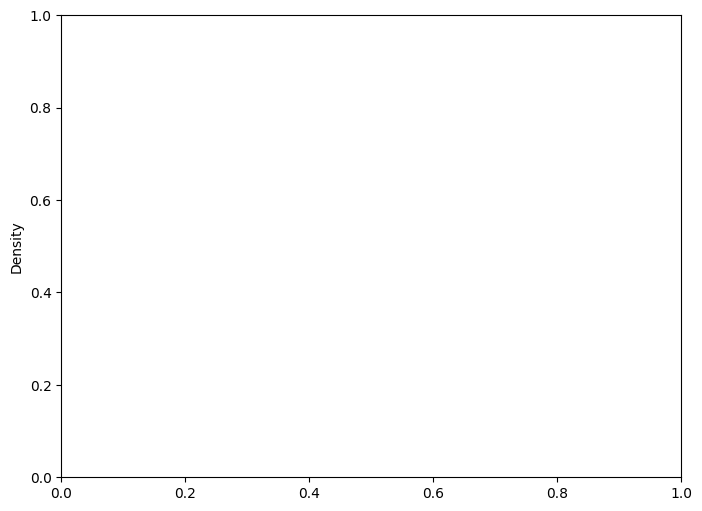

In [273]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple']
for i in range(topNum - 1, -1, -1):
    sns.kdeplot(sortedProbs[:, i], color=colors[i], shade=False, label=f'top_{topNum - i}')
# plt.xscale('log')
plt.show()

In [270]:
ems = topicModel.topic_embeddings_

array([[-0.13591135,  0.00778362, -0.06691327, ...,  0.12419377,
        -0.1496394 , -0.05380248],
       [ 0.00447418, -0.06822333,  0.0349725 , ...,  0.36694866,
        -0.30486712, -0.11735075],
       [-0.15103908, -0.01540668, -0.11444356, ...,  0.09309144,
        -0.05127537, -0.04427475],
       ...,
       [-0.24492382,  0.0651021 ,  0.0396539 , ...,  0.17292042,
        -0.23775332,  0.01904327],
       [-0.03532761, -0.19404824,  0.09298113, ...,  0.16325969,
        -0.19260304, -0.1004628 ],
       [-0.24408428,  0.07180458,  0.07191349, ...,  0.22068013,
        -0.09995294, -0.04096314]], dtype=float32)

In [98]:
# gap12Sim = topSim[:, -1] - topSim[:, -2]
# gap23Sim = topSim[:, -2] - topSim[:, -3]
# gap34Sim = topSim[:, -3] - topSim[:, -4]

# gapSims = np.array([gap34Sim, gap23Sim, gap12Sim])

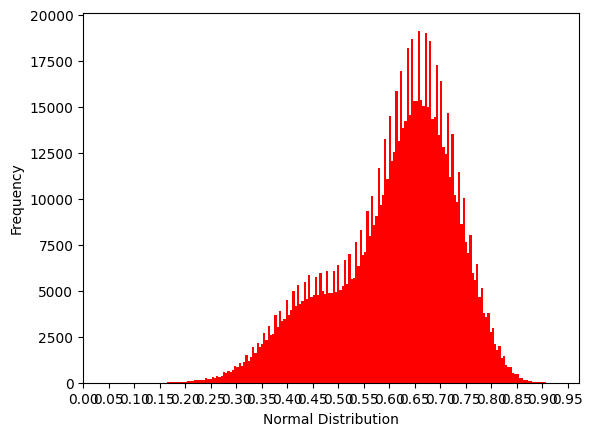

In [109]:
import seaborn as sns
from matplotlib import pyplot as plt
ax = sns.distplot(topSim[:, -1].flatten(),
                  bins=200,
                  kde=False,
                  color='red',
                  hist_kws={"linewidth": 1,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.xticks(np.arange(0, 1, 0.05))
plt.show()

<AxesSubplot: ylabel='Density'>

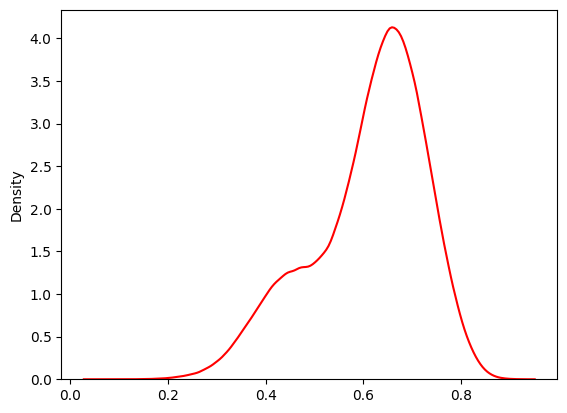

In [111]:
sns.kdeplot(topSim[:, -1], color='red', shade=False, label=f'top_1')


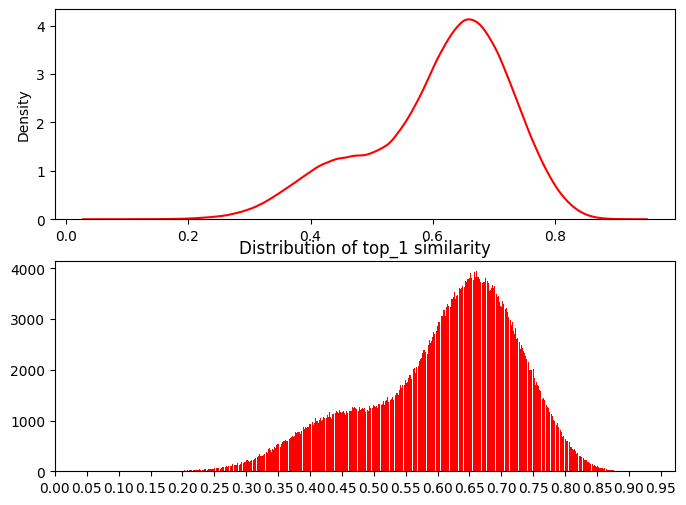

In [122]:
# draw 2 subgraph
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
sns.kdeplot(topSim[:, -1], color='red', shade=False, label=f'top_1', ax=axs[1])

sns.distplot(topSim[:, -1].flatten(),
                  bins=1000,
                  kde=False,
                  color='red',
                  hist_kws={"linewidth": 1,'alpha':1}, ax=axs[0])

plt.xticks(np.arange(0, 1, 0.05))
plt.title('Distribution of top_1 similarity', loc='center')
plt.show()


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

def saveFig2(data, title, outpath, myTopNum = None):
    thisTopNum = myTopNum or topNum
    colors = ['blue', 'orange', 'green', 'red', 'purple']
    for i in range(thisTopNum - 1, -1, -1):
        fig, axs = plt.subplots(2, 1, figsize=(8, 6))
        sns.kdeplot(data[:, i], color='red', shade=False, label=f'top_{thisTopNum - i}', ax=axs[1])

        fig0 = sns.distplot(data[:, i].flatten(),
                        bins=1000,
                        kde=False,
                        color='red',
                        hist_kws={"linewidth": 1,'alpha':1}, ax=axs[0])
        fig0.set_xticks(np.arange(0, 1, 0.05))
        plt.xticks(np.arange(0, 1, 0.05))
        plt.title(title.format(thisTopNum - i))
        plt.savefig(f'{outpath}_top{thisTopNum - i}.png')
        plt.close()
        plt.show()
        
saveFig2(topSim, 'Top {} Similarity Distribution', f'{outDir}/topSim')
saveFig2(topSimHasAb, 'Top {} Similarity Distribution (Has Abstract)', f'{outDir}/topSimHasAb')
saveFig2(topSimNoAb, 'Top {} Similarity Distribution (No Abstract)', f'{outDir}/topSimNoAb')
saveFig2(topSimHasAbPos, 'Top {} Similarity Distribution (Has Abstract Positive)', f'{outDir}/topSimHasAbPos')
saveFig2(topSimHasAbNeg, 'Top {} Similarity Distribution (Has Abstract Negative)', f'{outDir}/topSimHasAbNeg')


In [103]:
saveFig(gapSims, 'Gap Similarity Distribution', f'{outDir}/gapSimDist.png', myTopNum=3)

In [46]:
import os 

filedir = f'/home/sy/MAGProcessing/create_field/out/{field}'
dfFellow = pd.read_csv(f'{filedir}/fellow.csv')
dfNonFellow = pd.read_csv(f'{filedir}/non_fellow.csv')

dfFellow['fellow'] = 1
dfNonFellow['fellow'] = 0

dfFellow = dfFellow[['authorID', 'fellow']]
dfNonFellow = dfNonFellow[['authorID', 'fellow']]

dfAuthors = pd.concat([dfFellow, dfNonFellow], axis=0)
authorID2Fellow = dfAuthors.set_index('authorID').to_dict()['fellow']

topicNumbers = []
authorIDList = []

topicNum = docSim.shape[1]

originPaperIDIdxDt = {}
for idx, paperID in enumerate(dfSim.paperID.tolist()):
    originPaperIDIdxDt[str(paperID)] = idx

for fn in os.listdir(f'{filedir}/papers'):
    authorID = int(fn.split('.')[0])
    if (not authorID2Fellow.__contains__(authorID)):
        continue
    
    df = pd.read_csv(f'{filedir}/papers/{fn}')
    
    topicNumber = np.array([0.0] * topicNum)
    change = False
    for paperID in df['paperID']:
        if not originPaperIDIdxDt.__contains__(str(paperID)):
            continue
        topicNumber += docSim[originPaperIDIdxDt[str(paperID)]]
        change = True

    if not change:
        continue
    topicNumbers.append(topicNumber)
    authorIDList.append(int(fn.split('.')[0]))
    
dfTopicNumbers = pd.DataFrame(topicNumbers, columns=[f'topic_{i}' for i in range(topicNum)])
dfTopicNumbers['authorID'] = authorIDList
dfTopicNumbers['fellow'] = dfTopicNumbers['authorID'].map(authorID2Fellow)
dfTopicNumbers = dfTopicNumbers[['authorID', 'fellow'] + [f'topic_{i}' for i in range(topicNum)]]
dfTopicNumbers.to_csv(f'{outDir}/authorTopicNumbers.csv', index=False)

In [42]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, brunnermunzel
def test(feature, df1, df2):
    # check if the feature follows normal distribution in both dataframes
    _, p1 = shapiro(df1[feature])
    _, p2 = shapiro(df2[feature])
    
    # check if the variance is equal in both dataframes
    _, p3 = levene(df1[feature], df2[feature])
    
    # apply t-test if the feature follows normal distribution and has equal variance
    if p1 > 0.05 and p2 > 0.05 and p3 > 0.05:
        _, p = ttest_ind(df1[feature], df2[feature])
        test_method = 't-test'
    # apply Mann-Whitney U test if the feature does not follow normal distribution but has equal variance
    elif p1 <= 0.05 and p2 <= 0.05 and p3 > 0.05:
        _, p = mannwhitneyu(df1[feature], df2[feature])
        test_method = 'Mann-Whitney U test'
    # apply Brunner-Munzel test if the variance is not equal
    else:
        _, p = brunnermunzel(df1[feature], df2[feature])
        test_method = 'Brunner-Munzel test'
    
    return p, test_method

In [56]:
topicNumbers = np.asarray(topicNumbers)
fellowIndices = dfTopicNumbers[dfTopicNumbers['fellow'] == 1].index.tolist()
nonFellowIndices = dfTopicNumbers[dfTopicNumbers['fellow'] == 0].index.tolist()

dfFellowTopicNumbers = dfTopicNumbers.loc[fellowIndices, :]
dfNonFellowTopicNumbers = dfTopicNumbers.loc[nonFellowIndices, :]

sortedTopicNumbers = np.sort(topicNumbers, axis=1)  

In [57]:
features = [f'topic_{i}' for i in range(topicNum)]
# create an empty dictionary to store the p-value and test method for each feature
results = {}

# iterate through each feature/column in both dataframes
for feature in features:
    # call the test function and store the p-value and test method in the dictionary
    p_value, test_method = test(feature, dfFellowTopicNumbers, dfNonFellowTopicNumbers)
    results[feature] = {'p-value': p_value, 'test method': test_method}

# create a dataframe from the results dictionary
results_df = pd.DataFrame.from_dict(results, orient='index')

# select the features whose p-value is less than 0.05 (significant) and their test method
significant_features = results_df[(results_df['p-value'] < 0.05)]

# p-value column set to '{:.2e}'.format(p)
significant_features['p-value'] = significant_features['p-value'].apply(lambda p: '{:.2e}'.format(p))

# print the significant features and their test method
print(significant_features)

            p-value          test method
topic_0    3.95e-18  Brunner-Munzel test
topic_1    4.05e-54  Brunner-Munzel test
topic_2    1.71e-41  Brunner-Munzel test
topic_3    1.98e-29  Brunner-Munzel test
topic_4    6.19e-23  Mann-Whitney U test
...             ...                  ...
topic_415  1.71e-54  Brunner-Munzel test
topic_416  2.32e-64  Brunner-Munzel test
topic_417  2.51e-18  Brunner-Munzel test
topic_418  2.21e-23  Brunner-Munzel test
topic_419  9.84e-31  Brunner-Munzel test

[420 rows x 2 columns]


In [59]:
fellowTopicNumbers = topicNumbers[fellowIndices]
fellowTopicNumbers
# topicNumbers

array([[ 55.233,  71.523,  71.81 , ...,  41.911,  47.432,  61.822],
       [  6.112,   8.814,   6.311, ...,   4.584,   5.032,   6.462],
       [ 10.738,  13.77 ,  11.207, ...,   3.699,   9.489,  10.558],
       ...,
       [ 60.975,  81.013,  76.311, ...,  49.526,  50.29 ,  62.524],
       [159.498, 206.743, 150.394, ..., 107.332, 137.49 , 149.639],
       [ 19.523,  22.4  ,  25.561, ...,  16.389,  13.727,  23.717]])

In [ ]:
import pandas as pd

dfPaper = pd.read_csv('./output/fellowVSNon-tc100/paperIDDistribution.csv')


In [7]:
docInfo = topicModel.get_document_info(docs)
docInfo['paperID'] = paperKey
docInfo = docInfo[['paperID', 'Topic']]
docInfoPos = docInfo[docInfo['Topic'] != -1]

In [9]:
docInfoPos.reset_index(drop=True, inplace=True)

paperIDSet = set(docInfoPos['paperID'].tolist())
dfDist = pd.read_csv('./output/fellowVSNon-tc100/paperIDDistribution.csv')
dfDist = dfDist[dfDist['paperID'].isin(paperIDSet)]
dfDist.reset_index(drop=True, inplace=True)

df = pd.merge(docInfoPos, dfDist, on='paperID')
len(df), len(docInfoPos), len(dfDist)

(353811, 353811, 353811)

In [11]:
df

,paperID,Topic,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_104,topic_105,topic_106,topic_107,topic_108,topic_109,topic_110,topic_111,topic_112,topic_113
0,128716480,37,0.444,0.178,0.211,0.222,0.484,0.159,0.164,0.124,...,0.269,0.317,0.113,0.316,0.119,0.197,0.229,0.230,0.171,0.164
1,1494604159,60,0.443,0.515,0.492,0.409,0.330,0.399,0.565,0.348,...,0.307,0.358,0.131,0.166,0.211,0.357,0.238,0.375,0.342,0.451
2,1498228691,0,0.611,0.468,0.435,0.460,0.379,0.413,0.447,0.386,...,0.368,0.469,0.202,0.250,0.398,0.315,0.376,0.317,0.347,0.488
3,1502784368,9,0.387,0.458,0.473,0.448,0.341,0.209,0.445,0.363,...,0.313,0.219,0.154,0.319,0.425,0.347,0.246,0.411,0.241,0.367
4,1514801900,56,0.345,0.582,0.490,0.368,0.252,0.310,0.433,0.315,...,0.264,0.191,0.107,0.128,0.244,0.300,0.274,0.511,0.261,0.497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353806,615505425,8,0.412,0.589,0.540,0.508,0.272,0.384,0.528,0.451,...,0.406,0.314,0.132,0.292,0.329,0.310,0.245,0.412,0.332,0.617
353807,2017658453,113,0.306,0.490,0.378,0.418,0.164,0.181,0.471,0.360,...,0.288,0.095,0.202,0.209,0.286,0.270,0.233,0.346,0.340,0.598
353808,2098890648,1,0.319,0.571,0.404,0.314,0.252,0.433,0.426,0.348,...,0.358,0.243,0.155,0.118,0.287,0.233,0.280,0.317,0.349,0.546
353809,2217638893,66,0.347,0.518,0.490,0.491,0.268,0.438,0.384,0.336,...,0.416,0.174,0.024,0.295,0.349,0.324,0.163,0.515,0.399,0.490


In [12]:
import pandas as pd
import numpy as np

def fetchArray(df):
    df.fillna(0, inplace=True)
    docSim = []
    for _, row in df.iterrows():
        docSim.append(row.values.tolist()[2:])
    
    return np.asarray(docSim)


In [15]:
topicList = df['Topic'].tolist()
simArrays = fetchArray(df)
simArgs = np.argsort(simArrays, axis=1)[:, ::-1]
simArgs

array([[ 37,  15,  40, ...,  44,  73, 103],
       [ 60, 102,   6, ..., 107,  40, 106],
       [  0,  58,  70, ...,  38, 106,  61],
       ...,
       [  1, 113,  33, ...,  94, 107,  37],
       [ 66,  22,  18, ..., 110, 100, 106],
       [  2,   9,  57, ..., 107,  40, 106]])

In [18]:
len(topicList)

353811

96


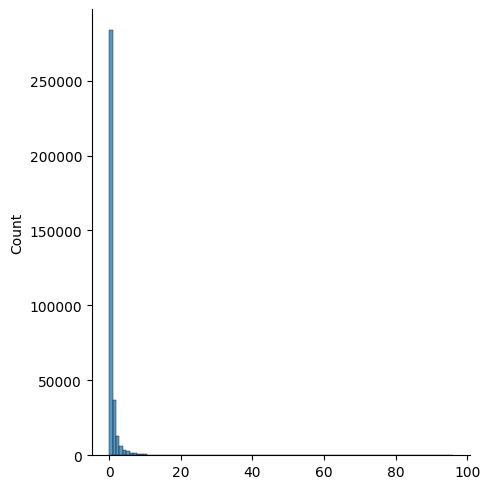

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

idxList = []
for topic, simArg in zip(topicList, simArgs):
    idx = simArg.tolist().index(topic)
    idxList.append(idx)

print(np.max(idxList))
sns.displot(idxList, kde=False, bins=100)
